**Importing libraries**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**DataFrame**

In [2]:
# Reading and encoding dataframe
attacks = pd.read_csv('/Users/victor/maria/ironhack_labs/attacks.csv', encoding='cp1252')
# Making a copy with which we can work
attacks_df = attacks.copy()

In [3]:
# Getting some basic info
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
# Deleting complet empty rows
attacks_df.dropna(axis = 0, how = 'all', inplace = True)
# Reassigning the columns titles
attacks_df.columns = attacks_df.columns.str.capitalize().str.strip()
# Changing specific column name
attacks_df = attacks_df.rename(columns = {'Fatal (y/n)': 'Fatal'})
# Deleting further non-valuable columns
attacks_df = attacks_df.drop(attacks_df[attacks_df['Case number'] == '0'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Case number'] == 'xx'].index)
# Showing all data in rows and columns
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 24)

In [5]:
# Checking if there is any valid ID
print(attacks_df['Case number.1'].is_unique)
print(attacks_df['Original order'].is_unique)
print(attacks_df['Href'].is_unique)
print(attacks_df['Pdf'].is_unique)

False
False
False
False


In [6]:
# Checking there are not duplicated rows, before setting a new ID
duplicateRows = attacks_df[attacks_df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [Case number, Date, Year, Type, Country, Area, Location, Activity, Name, Sex, Age, Injury, Fatal, Time, Species, Investigator or source, Pdf, Href formula, Href, Case number.1, Case number.2, Original order, Unnamed: 22, Unnamed: 23]
Index: []


In [7]:
# Deleting non-valuable columns for the analysis
attacks_df = attacks_df.drop(columns = ['Case number', 'Area', 'Name', 'Time', 'Investigator or source','Pdf','Href formula', 'Href', 'Case number.2', 'Original order', 'Unnamed: 22', 'Unnamed: 23'])
# Case number: is not unique, and doesn't give us relevant information
# Area: is a categorical variable with many different options, we will use Country instead
# Name: doesn't give us relevant info about the attack
# Time: is an incomplete variable
# Invesigation or source: doesn't give us relevant information about the attack
# Pdf: doesn't give us relevant info
# Href formula: doesn't give us relevant info
# Href: doesn't give us relevant info
# Case number.2: repeated column
# Original order: could be used to get the date easier, as well as Case Number, but we will use Date and Year instead
# Unnamed: 22: empty column
# Unnamed: 23: empty column

In [8]:
# Setting a new ID
attacks_df.index = [x for x in range(1, len(attacks_df.values)+1)]
# Giving a new name to the column ID
attacks_df.index.name = 'Attacks_ID'

In [9]:
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 1 to 6302
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6302 non-null   object 
 1   Year           6300 non-null   float64
 2   Type           6298 non-null   object 
 3   Country        6252 non-null   object 
 4   Location       5762 non-null   object 
 5   Activity       5758 non-null   object 
 6   Sex            5737 non-null   object 
 7   Age            3471 non-null   object 
 8   Injury         6274 non-null   object 
 9   Fatal          5763 non-null   object 
 10  Species        3464 non-null   object 
 11  Case number.1  6302 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.0+ KB


# Demographics

In [10]:
# Checking the status of the demographic columns
attacks_df[['Sex','Age']]

,Sex,Age
Attacks_ID,,
1,F,57
2,F,11
3,M,48
4,M,NaN
5,M,NaN
...,...,...
6298,M,NaN
6299,M,NaN
6300,M,NaN


## Age

In [11]:
attacks_df.Age.describe()

count     3471
unique     157
top         17
freq       154
Name: Age, dtype: object

In [12]:
attacks_df.Age.value_counts(dropna=False)

NaN         2831
17           154
18           150
19           142
20           141
            ... 
               1
86             1
33 & 26        1
16 to 18       1
9 months       1
Name: Age, Length: 158, dtype: int64

We have 640 valid data in Age, let's try to rise it a little bit

In [13]:
attacks_df.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

**If we assume:**
- Teenagers are between 13 and 19; so the mean will be *16*
- Youngs are from 20 to 30; so the mean will be *25*
- Adults are from 31 to 65; so the mean is *48*
- Elderly are from 66 to 100+; the mean is around *88*

In [14]:
# Cleaning Age column in order to get valuable data
attacks_df['Age'] = attacks_df['Age'].astype(str)
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*een.*$)', '16')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*oun.*$)', '25')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*dul.*$)', '48')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*lderl.*$)', '88')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*middle-a.*$)', '37')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*onth.*$)', '1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)s.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s$', 'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace('nan', 'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\s&.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sor.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sto.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sto.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s(\d\d)', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^(\d\d).*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\D*(\d\d)', r'\1')
attacks_df['Age'].replace(('\xa0', 'NaN'), inplace = True)
attacks_df['Age'] = attacks_df.Age.str.replace(r'(\d)\s\s\s.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s\s.*', r'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\D{1,}$', r'NaN')
attacks_df['Age'].replace(('2½', '25'), inplace = True)
attacks_df['Age'].replace(('6½', '65'), inplace = True)
attacks_df['Age'].fillna('NaN') 

<ipython-input-14-ecd24f3a5006>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*een.*$)', '16')
<ipython-input-14-ecd24f3a5006>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*oun.*$)', '25')
<ipython-input-14-ecd24f3a5006>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*dul.*$)', '48')
<ipython-input-14-ecd24f3a5006>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*lderl.*$)', '88')
<ipython-input-14-ecd24f3a5006>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*middle-a.*$)',

Attacks_ID
1       57
2       11
3       48
4       48
5       48
        ..
6298    16
6299    16
6300    16
6301    16
6302    15
Name: Age, Length: 6302, dtype: object

In [15]:
# Checking we have the expected output
attacks_df.Age.unique()

array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '69', '38',
       '55', '35', '46', '45', '14', '40', '28', '20', '24', '26', '49',
       '22', '7', '31', '17', '13', '42', '3', '8', '50', '16', '82',
       '73', '68', '51', '39', '58', '47', '61', '36', '66', '43', '9',
       '72', '59', '6', '27', '64', '23', '71', '44', '62', '63', '70',
       '1', '53', '77', '74', '5', '86', '84', 'NaN', '75', '87', '67',
       '88', '81', '78'], dtype=object)

In [16]:
attacks_df['Age'].describe()

count     6302
unique      80
top         17
freq       360
Name: Age, dtype: object

In [17]:
attacks_df.Age.value_counts(dropna=False)

17    360
16    330
18    329
19    309
15    276
     ... 
88      1
87      1
81      1
84      1
67      1
Name: Age, Length: 80, dtype: int64

In [18]:
attacks_df.Age.value_counts(normalize=True).head(15)

17    0.057125
16    0.052364
18    0.052206
19    0.049032
15    0.043796
20    0.043637
22    0.039194
21    0.037607
13    0.033481
24    0.028880
14    0.028404
30    0.026817
26    0.025389
23    0.024595
27    0.024595
Name: Age, dtype: float64

In [19]:
# Getting basic statistics
attacks_df['Age'] = pd.to_numeric(attacks_df['Age'], errors = 'coerce')
print('Age mean is: ', attacks_df.Age.mean())
print('Age median is: ', attacks_df.Age.median())
print('Age mode is: ', attacks_df.Age.mode())

Age mean is:  26.16199426568971
Age median is:  22.0
Age mode is:  0    17.0
dtype: float64


## Sex

In [20]:
attacks_df.Sex.describe()

count     5737
unique       6
top          M
freq      5094
Name: Sex, dtype: object

In [21]:
attacks_df.Sex.value_counts(dropna=False)

M      5094
F       637
NaN     565
N         2
M         2
.         1
lli       1
Name: Sex, dtype: int64

In [22]:
# Checking the current column status
attacks_df.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [23]:
# Cleaning Sex column in order to get valuable data
attacks_df['Sex'].replace(('lli', 'NaN'), inplace = True)
attacks_df['Sex'].replace(('N', 'NaN'), inplace = True)
attacks_df['Sex'].replace(('.', 'NaN'), inplace = True)
attacks_df['Sex'] = attacks_df.Sex.str.replace(r'^(M)\s$', r'\1')
attacks_df['Sex'].fillna('NaN') 

<ipython-input-23-3db0726362a1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Sex'] = attacks_df.Sex.str.replace(r'^(M)\s$', r'\1')


Attacks_ID
1       F
2       F
3       M
4       M
5       M
       ..
6298    M
6299    M
6300    M
6301    M
6302    M
Name: Sex, Length: 6302, dtype: object

In [24]:
# Checking we have the expected output
attacks_df.Sex.unique()

array(['F', 'M', nan], dtype=object)

In [25]:
attacks_df.Sex.value_counts(normalize=True)

M    0.888773
F    0.111227
Name: Sex, dtype: float64

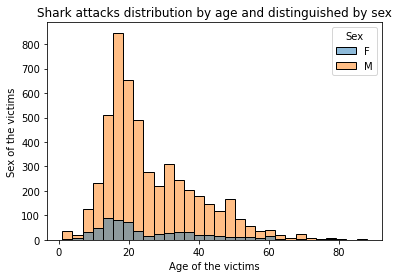

In [27]:
ages = attacks_df.Age.sort_values()
plot_ages = sns.histplot(x = ages, 
            hue = attacks_df.Sex,
           bins = 30);
plot_ages.set_title('Shark attacks distribution by age and distinguished by sex')
plot_ages.set(xlabel = 'Age of the victims', 
                ylabel='Sex of the victims');

> <span style="color:green"> Top model 1: __Demographics__ </span>

>_Procedure_
>- General dataframe cleaning (empty rows, non-valuable columns, rename columns, setting an autoincremental ID)
>    - Finally we have 6302 informative cases to work with
>- Cleaning Age series (from 3471 filled rows distribution in 157 unique values, to non-empty cells, normalizing the values to 80 unique values)
>- Cleaning Sex series (from 5737 filled rows distributed in 6 unique values, to non-empty cells in two unique values)
 
>_Conclusions_
>- Most victicms of shark attacks were predominantly teenagers or youngs, around to 22 y.o. in both sexs.
>- Even if it seems that men are most likely to be attacked by sharks (88%), it's important to keep in mind that with this data it is not possible to know if, for example, women come less close to the beach or if they are more cautious


# Space-time Statistics

In [28]:
attacks_df[['Date','Location', 'Country']]

,Date,Location,Country
Attacks_ID,,,
1,25-Jun-2018,"Oceanside, San Diego County",USA
2,18-Jun-2018,"St. Simon Island, Glynn County",USA
3,09-Jun-2018,"Habush, Oahu",USA
4,08-Jun-2018,Arrawarra Headland,AUSTRALIA
5,04-Jun-2018,La Ticla,MEXICO
...,...,...,...
6298,Before 1903,Roebuck Bay,AUSTRALIA
6299,Before 1903,NaN,AUSTRALIA
6300,1900-1905,Ocracoke Inlet,USA


## Date

In [29]:
# Checking the current column status
attacks_df.Date.describe()

count     6302
unique    5433
top       1957
freq        11
Name: Date, dtype: object

In [30]:
attacks_df.Date.value_counts(dropna=False)

1957           11
1942            9
1956            8
1958            7
1941            7
               ..
11-Nov-1937     1
06-Aug-2009     1
16-Mar-1859     1
24-May-1960     1
19-Aug-1945     1
Name: Date, Length: 5433, dtype: int64

In [31]:
attacks_df.Date.sort_values(ascending=False)

Attacks_ID
6272       World War II
6273       World War II
4803      Woirld War II
3445        Winter 1969
4722        Winter 1942
             ...       
652         22-Jul-2013
3405        16-Jan-1970
4850        15-Jun-1937
1175        10-Jan-2009
4426     \n1951.12.15.R
Name: Date, Length: 6302, dtype: object

In [32]:
# Remove duplicated hyphen (-)
attacks_df['Date'] = attacks_df.Date.str.replace(r'(-)\1+', r'\1')
# Remove starting word "Reported "
attacks_df['Date'] = attacks_df.Date.str.lstrip('Reported ')
# Parse date colum to datetime format (and replace string entries with NaT)
attacks_df['Date'] = pd.to_datetime(attacks_df['Date'], errors = 'coerce')

<ipython-input-32-cc53f5a0cfa9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r'(-)\1+', r'\1')


In [33]:
# Checking we have the expected output
attacks_df['Date'].dt.month

Attacks_ID
1       6.0
2       6.0
3       6.0
4       6.0
5       6.0
       ... 
6298    NaN
6299    NaN
6300    NaN
6301    NaN
6302    NaN
Name: Date, Length: 6302, dtype: float64

In [34]:
# Checking how many "NaT" we have after cleaning
attacks_df['Date'].isna().sum()

303

In [35]:
# Creating new columns with the clean data extracted
attacks_df['Months'] = attacks_df.Date.dt.month
attacks_df['Years'] = attacks_df.Date.dt.year

## Location

In [41]:
attacks_df.Location.describe()

count                                 5762
unique                                4108
top       New Smyrna Beach, Volusia County
freq                                   163
Name: Location, dtype: object

In [42]:
attacks_df.Location.value_counts(dropna=False)

NaN                                                 540
New Smyrna Beach, Volusia County                    163
Daytona Beach, Volusia County                        30
Ponce Inlet, Volusia County                          20
Melbourne Beach, Brevard County                      18
                                                   ... 
Ritidian Point                                        1
Edisto Beach, Colleton County                         1
North of Walkers Cay                                  1
Breezy Point, Ntlonyana                               1
Ocean Beach, San Francisco, San Francisco County      1
Name: Location, Length: 4109, dtype: int64

In [43]:
# There are so many unique values, it's necessary to group them, or use the Country instead the Location
new_Location = attacks_df.Location.str.extract(r'(?P<Beach>.+),(?P<County>.+)')[['County', 'Beach']]
attacks_df.Location = new_Location.County

In [44]:
# Location column is not useful at the visual inspection level
# With 807 categories no graphic conclusion can be drawn instead you use a world heatmap
attacks_df.Location.describe()

count                2795
unique                838
top        Volusia County
freq                  295
Name: Location, dtype: object

In [45]:
# The locations with a higher shark attacks register are: 
attacks_df.Location.value_counts(dropna=False).head(11)

NaN                    3507
 Volusia County         295
 Palm Beach County      101
 Brevard County          85
 Maui                    74
 O'ahu                   54
 Durban                  45
 Monroe County           43
 Sydney                  41
 Los Angeles County      39
 Duval County            37
Name: Location, dtype: int64

> <span style="color:green"> Top model 2: __Space-time statistics__ </span>

>_Procedure_
>- Parse date colum to datetime format, allowing us to study year and month information independently
>- Cleaning Location series in order to get a clustered sample
 
>_Conclusions_
>- Attacks are mostly registered in Florida, Hawaii, South Africa and Australia
>- Most shark attacks happened during January and Jul-August, probably it could be driven by the summertime in different hemisphere
>- Shark attack records have been gradually increasing until our days, highlighting a peak in the 1960s

>_(These data is not normalized, so should be taked carefully as probably records have been increased  during last years by technology facilities)_

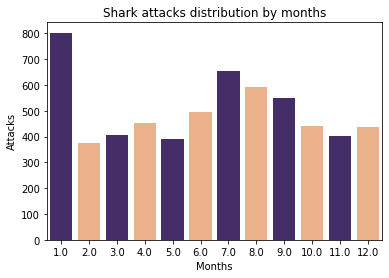

In [46]:
plot_months = sns.countplot(x = attacks_df['Months'],
                 palette = ['#432371',"#FAAE7B"])
plot_months.set_title('Shark attacks distribution by months')
plot_months.set(xlabel = 'Months', 
       ylabel='Attacks');

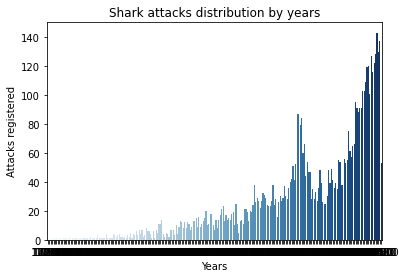

In [50]:
plot_years = sns.countplot(x = attacks_df.Years,
                           palette = 'Blues');
plot_years.set_title('Shark attacks distribution by years')
plot_years.set(xlabel = 'Years', 
       ylabel='Attacks registered');

# Free project

## Country

In [51]:
# Checking current data status
attacks_df.Country.describe()

count     6252
unique     212
top        USA
freq      2229
Name: Country, dtype: object

In [52]:
attacks_df.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [53]:
# Cleaning data in order to get valuable info
attacks_df['Country'].replace(('nan', 'NaN'), inplace = True)
attacks_df['Country'].fillna('NaN')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)\s/.*', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)?', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^Between\s(.*)\s.*', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*British*.', 'UNITED KINGDOM')
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*BRITISH*.', 'UNITED KINGDOM')
attacks_df['Country'].replace(('PALESTINIAN TERRITORIES', 'PALESTINA'), inplace = True)
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*TURKS*.', 'TURKEY')
attacks_df['Country'].replace(('UNITED ARAB EMIRATES (UAE)', 'UNITED ARAB EMIRATES'), inplace = True)
attacks_df['Country'].replace(('GULF OF ADEN', 'SOMALIA'), inplace = True)
attacks_df['Country'].replace(('ST. MAARTIN', 'NETHERLANDS'), inplace = True)
attacks_df['Country'].replace(('CEYLON (SRI LANKA)', 'SRI LANKA'), inplace = True)


<ipython-input-53-3ada7e76a166>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)\s/.*', r'\1')
<ipython-input-53-3ada7e76a166>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)?', r'\1')
<ipython-input-53-3ada7e76a166>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^Between\s(.*)\s.*', r'\1')
<ipython-input-53-3ada7e76a166>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'.*British*.', 'UNITED KINGDOM')
<ipython-input-53-3ada7e76a166>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country']

In [54]:
# Checking we have the expected output
attacks_df.Country.describe()

count     6252
unique     199
top        USA
freq      2235
Name: Country, dtype: object

In [55]:
attacks_df.Country.value_counts(dropna=False).head(11)

USA                 2235
AUSTRALIA           1344
SOUTH AFRICA         581
PAPUA NEW GUINEA     135
NEW ZEALAND          129
BRAZIL               113
BAHAMAS              110
MEXICO                89
ITALY                 72
FIJI                  63
PHILIPPINES           61
Name: Country, dtype: int64

## Type

In [56]:
# Checking the current data we have
attacks_df.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [57]:
# Cleaning data in order to get two categories: provoked & unprovoked
attacks_df['Type'] = attacks_df['Type'].astype(str)
attacks_df['Type'].replace(('', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Boat', 'NaN'), inplace = True)
attacks_df['Type'].replace(('nan', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Boatomg', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Boating', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Questionable', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Sea Disaster', 'NaN'), inplace = True)
attacks_df['Type'].replace(('Invalid', 'NaN'), inplace = True)

attacks_df = attacks_df.drop(attacks_df[attacks_df['Type'] == 'Boating'].index)

attacks_df['Type'].fillna('NaN') 

Attacks_ID
2       Unprovoked
3       Unprovoked
4       Unprovoked
5         Provoked
6       Unprovoked
           ...    
6298    Unprovoked
6299    Unprovoked
6300    Unprovoked
6301    Unprovoked
6302    Unprovoked
Name: Type, Length: 6301, dtype: object

In [58]:
# Checking if we have the expected output
attacks_df.Type.value_counts(normalize = True)

Unprovoked    0.883193
Provoked      0.116807
Name: Type, dtype: float64

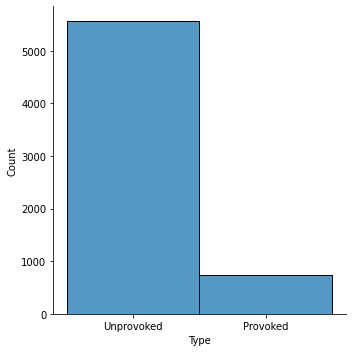

In [61]:
sns.displot(x = attacks_df.Type);

## Activity

In [62]:
# Checking different categories we have
attacks_df.Activity.value_counts()

Surfing                                                                                                              971
Swimming                                                                                                             869
Fishing                                                                                                              431
Spearfishing                                                                                                         333
Bathing                                                                                                              162
                                                                                                                    ... 
Washed overboard from the barque Mary Eady                                                                             1
Dived from inner-tube                                                                                                  1
Swimming, after boat swamped    

In [63]:
# Cleaning the data in order to get some heterogeneous clusters
attacks_df['Activity'] = attacks_df['Activity'].astype(str)
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*diving*', 'Diving')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Diving.*', 'Diving')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*oogie.*', 'Body boarding')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Walking*', 'Standing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*wimming.*', 'Swimming')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*bathing.*', 'Swimming')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Bathing.*', 'Swimming')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*fish.*', 'Sailing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Fish.*', 'Sailing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*sail.*', 'Sailing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*surf.*', 'Surfing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Treading.*', 'Standing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Surf skiing.*', 'Surf-skiing')
attacks_df['Activity'] = attacks_df.Activity.str.replace(r'\w{13}', 'NaN')
attacks_df['Activity'].fillna('NaN') 

<ipython-input-63-20ce446f2222>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*diving*', 'Diving')
<ipython-input-63-20ce446f2222>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Diving.*', 'Diving')
<ipython-input-63-20ce446f2222>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*oogie.*', 'Body boarding')
<ipython-input-63-20ce446f2222>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Activity'] = attacks_df.Activity.str.replace(r'^.*Walking*', 'Standing')
<ipython-input-63-20ce446f2222>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attack

Attacks_ID
2       Standing
3        Surfing
4        Surfing
5         Diving
6        Surfing
          ...   
6298      Diving
6299      Diving
6300    Swimming
6301         nan
6302    Swimming
Name: Activity, Length: 6301, dtype: object

In [64]:
# Checking the final output
attacks_df.Activity.value_counts(dropna=False).head(15)

Swimming          1301
Sailing           1172
Surfing           1112
Diving             578
nan                544
Standing           153
Wading             149
Body boarding      116
Snorkeling          89
Kayaking            33
Fell overboard      32
Surf-skiing         31
Floating            14
Canoeing            13
Rowing              12
Name: Activity, dtype: int64

## Injury

In [66]:
attacks_df['Injury'].describe() 

count      6273
unique     3736
top       FATAL
freq        802
Name: Injury, dtype: object

In [67]:
# Cheking the current data we have
attacks_df.Injury.value_counts().head(15)

FATAL                        802
Survived                      97
Foot bitten                   87
No injury                     82
Leg bitten                    72
Left foot bitten              50
No details                    43
Right foot bitten             39
No injury, board bitten       31
Hand bitten                   29
Thigh bitten                  27
FATAL, body not recovered     24
Calf bitten                   22
Minor injury                  22
Foot lacerated                21
Name: Injury, dtype: int64

In [68]:
# Cleaning data in order to normalize it in clusters
attacks_df['Injury'] = attacks_df['Injury'].astype(str)
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*FATAL.*', 'FATAL')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*Fatal.*', 'FATAL')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*bitten.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*bitten.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*No injury.*', 'No injury')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*acerat.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*njur.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*evere.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*wound.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*brasio.*', 'Bitten')
attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^\D{13}$', 'NaN')
attacks_df['Injury'].replace(('No details','NaN'), inplace = True)
attacks_df['Injury'].fillna('NaN') 

<ipython-input-68-c94a3db1209f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*FATAL.*', 'FATAL')
<ipython-input-68-c94a3db1209f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*Fatal.*', 'FATAL')
<ipython-input-68-c94a3db1209f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*bitten.*', 'Bitten')
<ipython-input-68-c94a3db1209f>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Injury'] = attacks_df.Injury.str.replace(r'^.*bitten.*', 'Bitten')
<ipython-input-68-c94a3db1209f>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Injury'] = attacks_df

Attacks_ID
2       Bitten
3       Bitten
4       Bitten
5       Bitten
6       Bitten
         ...  
6298     FATAL
6299     FATAL
6300     FATAL
6301     FATAL
6302     FATAL
Name: Injury, Length: 6301, dtype: object

In [69]:
# Checking the output
attacks_df['Injury'].describe() 

count       6301
unique       732
top       Bitten
freq        4026
Name: Injury, dtype: object

## Fatal

In [70]:
# Checking the status of the data we have
attacks_df['Fatal'].describe() 

count     5762
unique       8
top          N
freq      4292
Name: Fatal, dtype: object

In [71]:
attacks_df['Fatal'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [72]:
# Cleaning the column in order to get only two options
attacks_df['Fatal'] = attacks_df['Fatal'].astype(str)
attacks_df['Fatal'].replace(('nan','NaN'), inplace = True)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Fatal'] == 'y'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Fatal'] == 'M'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Fatal'] == 'UNKNOWN'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Fatal'] == '2017'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Fatal'] == ' N'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Fatal'] == 'N '].index)
attacks_df['Fatal'].fillna('NaN') 

Attacks_ID
2       N
3       N
4       N
5       N
6       N
       ..
6298    Y
6299    Y
6300    Y
6301    Y
6302    Y
Name: Fatal, Length: 6211, dtype: object

In [73]:
# Cheking we have the expected output
attacks_df.Fatal.unique()

array(['N', 'Y'], dtype=object)

In [74]:
attacks_df['Fatal'].value_counts(normalize = True) 

N    0.755112
Y    0.244888
Name: Fatal, dtype: float64

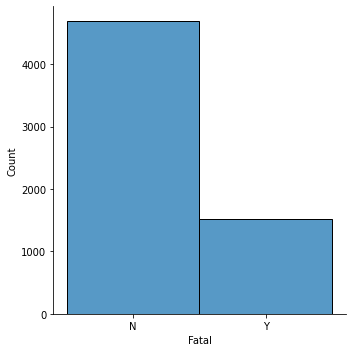

In [75]:
# Attacks mortality distribution
sns.displot(x = attacks_df.Fatal);

In [76]:
attacks_df.Fatal.value_counts(normalize=True)
# 24% of shark attacks are fatal

N    0.755112
Y    0.244888
Name: Fatal, dtype: float64

In [77]:
attacks_df.Species.describe()

count            3431
unique           1538
top       White shark
freq              159
Name: Species, dtype: object

## New dataset

In [78]:
# Cleaning the non usefull columns
attacks_df = attacks_df.drop(columns = ['Date', 'Year', 'Location', 'Species', 'Case number.1'])

In [79]:
# Saving clean dataframe
attacks_df.to_pickle("sharks_df.csv")